In [3]:
import pandas as pd

In [8]:

ruta = "C:/Users/DELL/Desktop/Octavo ciclo/Inteligencia Artificial/Mall_Customers-2.csv"

In [9]:

dataframe = pd.read_csv(ruta, index_col=0)

In [10]:

dataframe.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [11]:

dataframe.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [12]:
dataframe.rename(columns={"Annual Income (k$)": "ingresos", "Spending Score (1-100)": "gastos", "Age": "edad", "Gender": "genero"}, inplace=True)
dataframe

,genero,edad,ingresos,gastos
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [13]:

dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
ingresos,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
gastos,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [14]:

dataframe["genero"].value_counts()

genero
Female    112
Male       88
Name: count, dtype: int64

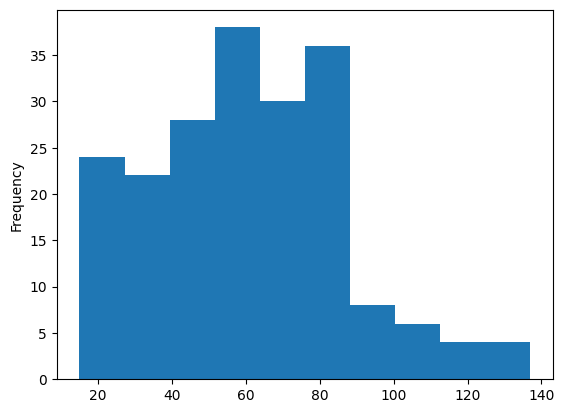

In [15]:

dataframe.ingresos.plot(kind="hist");

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

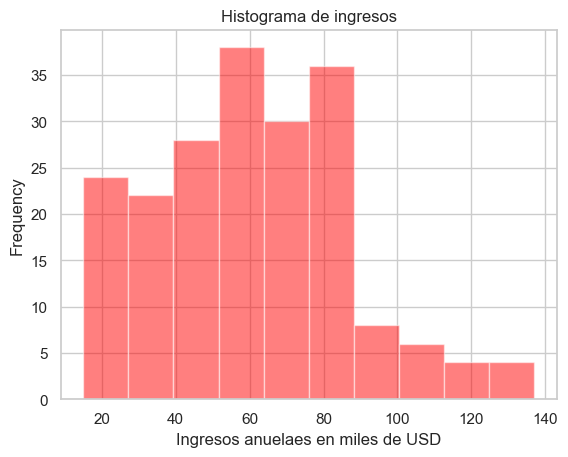

In [18]:

dataframe.ingresos.plot(kind="hist", color="red", alpha=0.5)
plt.title("Histograma de ingresos")
plt.xlabel("Ingresos anuelaes en miles de USD");

In [19]:

import numpy as np

In [20]:

dataframe['Segmento'] = np.where(dataframe['ingresos'] >= 90, 'ingreso alto', np.where(dataframe['ingresos'] < 50, 'ingreso bajo', 'ingreso moderado'))
dataframe

,genero,edad,ingresos,gastos,Segmento
CustomerID,,,,,
1,Male,19,15,39,ingreso bajo
2,Male,21,15,81,ingreso bajo
3,Female,20,16,6,ingreso bajo
4,Female,23,16,77,ingreso bajo
5,Female,31,17,40,ingreso bajo
...,...,...,...,...,...
196,Female,35,120,79,ingreso alto
197,Female,45,126,28,ingreso alto
198,Male,32,126,74,ingreso alto


In [21]:

dataframe.Segmento.value_counts()

Segmento
ingreso moderado    106
ingreso bajo         72
ingreso alto         22
Name: count, dtype: int64

In [22]:

dataframe.groupby("Segmento")['ingresos'].describe()

,count,mean,std,min,25%,50%,75%,max
Segmento,,,,,,,,
ingreso alto,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
ingreso bajo,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
ingreso moderado,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0


In [24]:

from sklearn.preprocessing import StandardScaler

In [25]:

scaler = StandardScaler()

In [26]:

columnas_a_escalar = [ 'edad', 'ingresos', 'gastos']
datos_a_escalar = dataframe.copy()

In [27]:
datos_a_escalar[columnas_a_escalar] = scaler.fit_transform(datos_a_escalar[columnas_a_escalar])

In [28]:

dataframe

,genero,edad,ingresos,gastos,Segmento
CustomerID,,,,,
1,Male,19,15,39,ingreso bajo
2,Male,21,15,81,ingreso bajo
3,Female,20,16,6,ingreso bajo
4,Female,23,16,77,ingreso bajo
5,Female,31,17,40,ingreso bajo
...,...,...,...,...,...
196,Female,35,120,79,ingreso alto
197,Female,45,126,28,ingreso alto
198,Male,32,126,74,ingreso alto


In [29]:

datos_a_escalar

,genero,edad,ingresos,gastos,Segmento
CustomerID,,,,,
1,Male,-1.424569,-1.738999,-0.434801,ingreso bajo
2,Male,-1.281035,-1.738999,1.195704,ingreso bajo
3,Female,-1.352802,-1.700830,-1.715913,ingreso bajo
4,Female,-1.137502,-1.700830,1.040418,ingreso bajo
5,Female,-0.563369,-1.662660,-0.395980,ingreso bajo
...,...,...,...,...,...
196,Female,-0.276302,2.268791,1.118061,ingreso alto
197,Female,0.441365,2.497807,-0.861839,ingreso alto
198,Male,-0.491602,2.497807,0.923953,ingreso alto


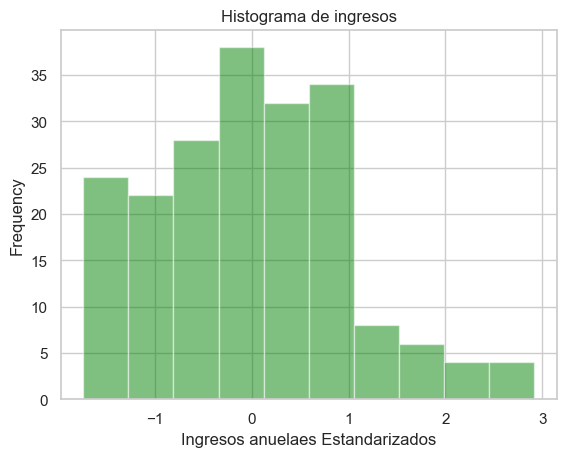

In [30]:
datos_a_escalar.ingresos.plot(kind="hist", color="green", alpha=0.5)
plt.title("Histograma de ingresos")
plt.xlabel("Ingresos anuelaes Estandarizados");

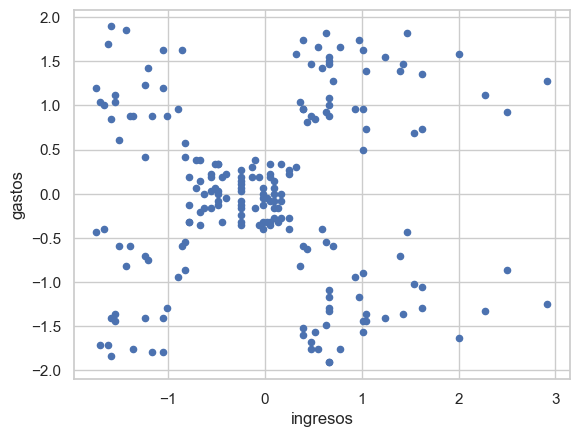

In [31]:
columnas_a_segmentar = ['ingresos', 'gastos']
datos_a_escalar.plot(kind="scatter", x=columnas_a_segmentar[0], y=columnas_a_segmentar[1]);

In [32]:
from sklearn.cluster import KMeans

In [33]:
modelo = KMeans(n_clusters=5, random_state=12)

In [34]:
modelo = KMeans(n_clusters=5, random_state=12)

In [35]:
modelo.fit(datos_a_escalar[columnas_a_segmentar])

KMeans(n_clusters=5, random_state=12)

In [36]:
datos_a_escalar['Segmento2'] = modelo.predict(datos_a_escalar[columnas_a_segmentar])

In [37]:

datos_a_escalar.Segmento.value_counts()

Segmento
ingreso moderado    106
ingreso bajo         72
ingreso alto         22
Name: count, dtype: int64

In [38]:
datos_a_escalar.Segmento2.value_counts()

Segmento2
1    81
3    39
2    35
0    23
4    22
Name: count, dtype: int64

In [39]:

marcadores = ['x','*', '.', '|','_']

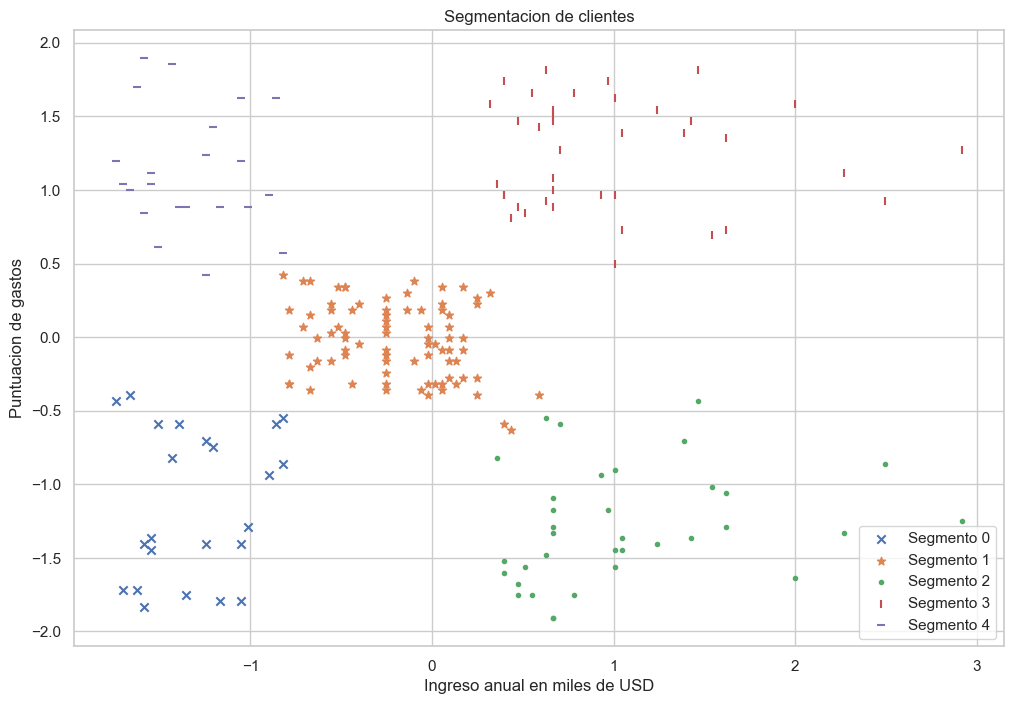

In [40]:
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura

for segmento in range(5):  # 5 segmentos desde 0 a 4
    dato_segmento_tmp = datos_a_escalar[datos_a_escalar.Segmento2 == segmento]
    plt.scatter(dato_segmento_tmp.ingresos, dato_segmento_tmp.gastos, marker=marcadores[segmento], label=f"Segmento {segmento}")

# pintado
plt.xlabel("Ingreso anual en miles de USD")
plt.ylabel("Puntuacion de gastos")
plt.title("Segmentacion de clientes")
plt.legend()
plt.show()

In [41]:

datos_a_escalar[columnas_a_escalar].head()

,edad,ingresos,gastos
CustomerID,,,
1,-1.424569,-1.738999,-0.434801
2,-1.281035,-1.738999,1.195704
3,-1.352802,-1.700830,-1.715913
4,-1.137502,-1.700830,1.040418
5,-0.563369,-1.662660,-0.395980


In [42]:

modelo2 = KMeans(n_clusters=4, random_state=17)

In [43]:

modelo2.fit(datos_a_escalar[columnas_a_escalar])

KMeans(n_clusters=4, random_state=17)

In [44]:
datos_a_escalar['Segmento3'] = modelo2.predict(datos_a_escalar[columnas_a_escalar])

In [45]:

datos_a_escalar

,genero,edad,ingresos,gastos,Segmento,Segmento2,Segmento3
CustomerID,,,,,,,
1,Male,-1.424569,-1.738999,-0.434801,ingreso bajo,0,0
2,Male,-1.281035,-1.738999,1.195704,ingreso bajo,4,0
3,Female,-1.352802,-1.700830,-1.715913,ingreso bajo,0,0
4,Female,-1.137502,-1.700830,1.040418,ingreso bajo,4,0
5,Female,-0.563369,-1.662660,-0.395980,ingreso bajo,0,0
...,...,...,...,...,...,...,...
196,Female,-0.276302,2.268791,1.118061,ingreso alto,3,2
197,Female,0.441365,2.497807,-0.861839,ingreso alto,2,3
198,Male,-0.491602,2.497807,0.923953,ingreso alto,3,2


In [46]:

from mpl_toolkits import mplot3d

In [48]:
columnas_a_escalar = [ 'edad', 'ingresos', 'gastos']



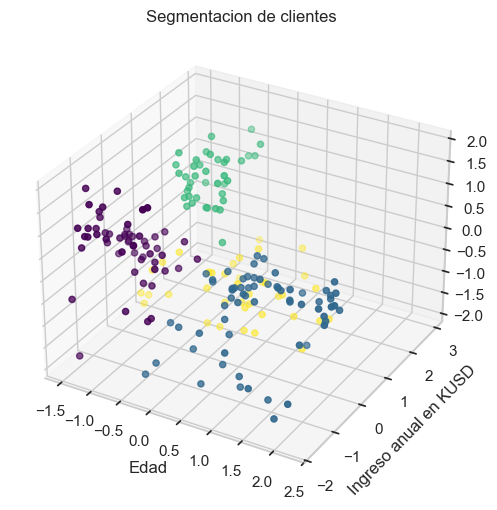

In [49]:

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(datos_a_escalar['edad'], datos_a_escalar['ingresos'], datos_a_escalar['gastos'], c=datos_a_escalar['Segmento3'], cmap='viridis')

plt.title("Segmentacion de clientes")
plt.xlabel("Edad")
plt.ylabel("Ingreso anual en KUSD ")
plt.show();

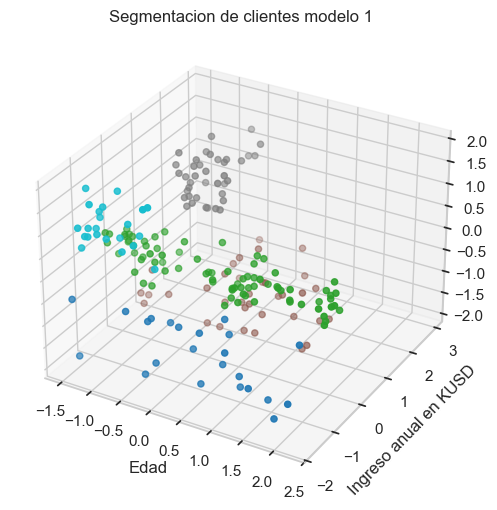

In [50]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(datos_a_escalar['edad'], datos_a_escalar['ingresos'], datos_a_escalar['gastos'], c=datos_a_escalar['Segmento2'], cmap='tab10')

plt.title("Segmentacion de clientes modelo 1")
plt.xlabel("Edad")
plt.ylabel("Ingreso anual en KUSD ")
plt.show();

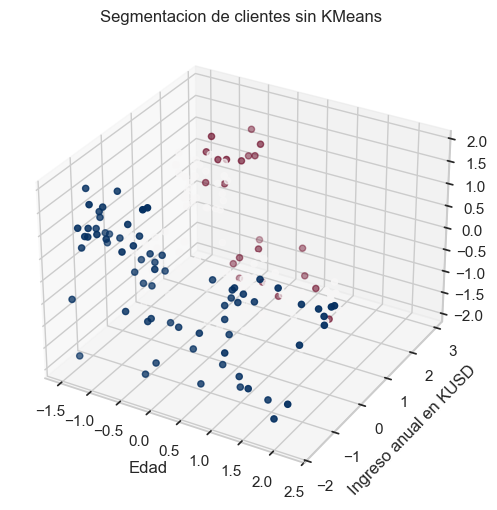

In [51]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

segmento_numerico = datos_a_escalar['Segmento'].map({'ingreso bajo': 0, 'ingreso moderado': 1, 'ingreso alto': 2})
ax.scatter3D(datos_a_escalar['edad'], datos_a_escalar['ingresos'], datos_a_escalar['gastos'], c=segmento_numerico, cmap='RdBu_r')

plt.title("Segmentacion de clientes sin KMeans")
plt.xlabel("Edad")
plt.ylabel("Ingreso anual en KUSD ")
plt.show();